# MLPNets Demonstration

Hello! This notebook will use some cool stuff from the neural net world and demonstrate how to use the lib MLPNets.

I know you can do anything by yourself, but It is easyer to know you can relly on some good libreries, isn't?
Lets import them now.

In [1]:
# To help us transforming and filtering our data:
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import train_test_split

# To import our file into a dataset: 
import pandas as pd

# To plot graphs like Da Vinci:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Our Neural Network guys
import MLPClassifier
import MLPRegressor

Good, we have all we need to work. Lets import and check our dataset.

In [2]:
data = pd.read_csv("dengue_flu_illness.csv")
data.head()

,temperature,body_aches,head_aches,diarrhea,nausea,coughing,runny_nose,has_dengue,has_flu,illness_score
0,36.5,0,1,0,0,0,0,0,0,4.65
1,36.5,0,1,1,0,0,1,0,0,6.65
2,37.0,0,0,0,1,0,0,0,0,4.70
3,37.0,1,1,1,0,0,0,0,0,6.70
4,37.5,0,0,2,0,0,0,0,0,5.75


It is a good idea to partition the data into training and test datasets.

In [3]:
data_train, data_test = train_test_split(data, test_size=0.3)

In [4]:
# Training data
y1 = data_train[["has_dengue", "has_flu"]]
y2 = data_train[["illness_score"]]
X1 = data_train.drop(columns=y1).drop(columns=y2).values
X2 = data_train.drop(columns=y2).values
y1 = y1.values
y2 = y2.values

# Testing data
ytest1 = data_test[["has_dengue", "has_flu"]]
ytest2 = data_test[["illness_score"]]
Xtest1 = data_test.drop(columns=ytest1).drop(columns=ytest2).values
Xtest2 = data_test.drop(columns=ytest2).values
ytest1 = ytest1.values
ytest2 = ytest2.values

Now lets create scaled and normalized versions of our dataset.

In [5]:
# Lets try with scaled and normalized Xs
Xscaled1 = scale(X1)
Xnorm1 = normalize(X1)
Xscaled_test1 = scale(Xtest1)
Xnorm_test1 = normalize(Xtest1)

Xscaled2 = scale(X2)
Xnorm2 = normalize(X2)
Xscaled_test2 = scale(Xtest2)
Xnorm_test2 = normalize(Xtest2)

It is always a good idea to take a look into correlations between your data.

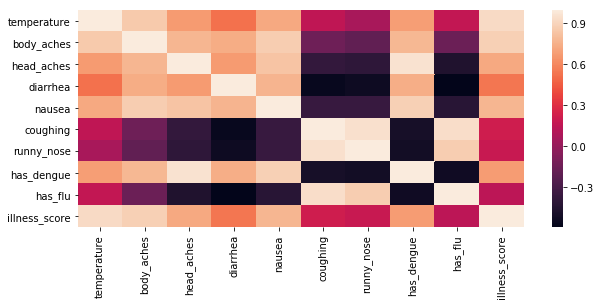

In [6]:
plt.figure(figsize=[10,4])
sb.heatmap(data.corr())
plt.show()

## The Classifier

Here we are going to create a classifier, with 2 boolean outputs:

In [7]:
# X Shape: 5,n - Y Shape: 2,n
clf = MLPClassifier.MLPClassifier(7, 14, 2, 0.001, 2500, debug=1)
clf.fit(Xscaled1, y1)

>>> mse: 0.27141
>>> mse: 0.07987
>>> mse: 0.01657
>>> mse: 0.00053
>>> mse: 0.00016
>>> mse: 0.00015
>>> mse: 0.00017
>>> mse: 0.00012
>>> mse: 5e-05
>>> mse: 1e-05


In [8]:
print("Labels: \n", ytest1)
print("Predicted Labels: \n", clf.predict(Xscaled_test1))

Labels: 
 [[0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]]
Predicted Labels: 
 [[ 0.  1.]
 [ 1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


## The Regression

Here we are going to create a regression model with 1 numeric output:

In [9]:
# X Shape: 5,n - Y Shape: 1,n
reg = MLPRegressor.MLPRegressor(9, 200, 1, 0.005, 2500, debug=1)
reg.fit(Xnorm2, y2)

>>> mse: 120.57248
>>> mse: 3.90534
>>> mse: 8.04743
>>> mse: 5.56807
>>> mse: 4.48714
>>> mse: 0.32031
>>> mse: 1.35622
>>> mse: 0.95355
>>> mse: 1.06715
>>> mse: 0.9226


[[ 10.9 ]
 [ 18.  ]
 [  6.7 ]
 [ 16.95]
 [ 13.9 ]
 [ 11.9 ]]
[[ 11.84122]
 [ 19.34808]
 [  6.40511]
 [ 18.58318]
 [ 12.98516]
 [ 12.93176]]


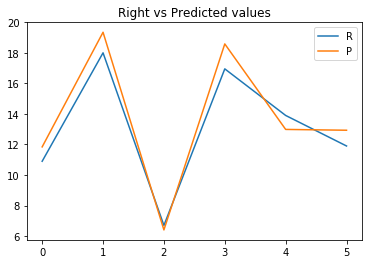

In [10]:
print(ytest2)
print(reg.predict(Xnorm_test2))
plt.plot(ytest2)
plt.plot(reg.predict(Xnorm_test2))
plt.legend("RP")
plt.title("Right vs Predicted values")
plt.show()